<a href="https://colab.research.google.com/github/ckiekim/Colab/blob/main/02_CPU_vs_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# seed 값 설정
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255
Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [5]:
# 컨볼루션 신경망 설정
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), 
           activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [8]:
!ls -l

total 8
drwxr-xr-x 2 root root 4096 Feb  5 02:36 model
drwxr-xr-x 1 root root 4096 Feb  1 17:27 sample_data


In [9]:
modelpath = MODEL_DIR + "mnist-cnn-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [10]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=30,
                    batch_size=200, #epochs=5, verbose=2, 
                    callbacks=[early_stopping_callback, checkpointer])

Epoch 1/30
240/240 [==============================] - 10s 12ms/step - loss: 0.6063 - accuracy: 0.8089 - val_loss: 0.0718 - val_accuracy: 0.9794

Epoch 00001: val_loss improved from inf to 0.07185, saving model to ./model/mnist-cnn-01-0.0718.hdf5
Epoch 2/30
240/240 [==============================] - 3s 11ms/step - loss: 0.1043 - accuracy: 0.9690 - val_loss: 0.0528 - val_accuracy: 0.9850

Epoch 00002: val_loss improved from 0.07185 to 0.05276, saving model to ./model/mnist-cnn-02-0.0528.hdf5
Epoch 3/30
240/240 [==============================] - 3s 11ms/step - loss: 0.0662 - accuracy: 0.9802 - val_loss: 0.0447 - val_accuracy: 0.9869

Epoch 00003: val_loss improved from 0.05276 to 0.04469, saving model to ./model/mnist-cnn-03-0.0447.hdf5
Epoch 4/30
240/240 [==============================] - 3s 11ms/step - loss: 0.0592 - accuracy: 0.9811 - val_loss: 0.0418 - val_accuracy: 0.9887

Epoch 00004: val_loss improved from 0.04469 to 0.04183, saving model to ./model/mnist-cnn-04-0.0418.hdf5
Epoch 5

In [11]:
!ls model

mnist-cnn-01-0.0718.hdf5  mnist-cnn-03-0.0447.hdf5  mnist-cnn-05-0.0389.hdf5
mnist-cnn-02-0.0528.hdf5  mnist-cnn-04-0.0418.hdf5  mnist-cnn-07-0.0367.hdf5


In [14]:
from keras.models import load_model
del model
model = load_model('model/mnist-cnn-07-0.0367.hdf5')

In [15]:
# 테스트 정확도 출력 
acc = model.evaluate(X_test, Y_test, verbose=0)[1]
print(f"Test Accuracy:{acc:.4f}")

Test Accuracy:0.9915


In [16]:
# 검증셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

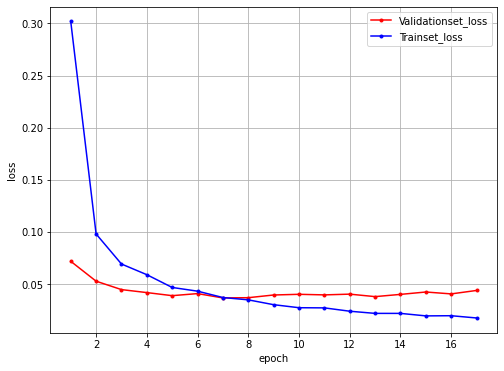

In [17]:
# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Validationset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
#plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()